# 1   Regressão Linear com uma Variável

In [1]:
#importando bibliotecas necessárias
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
# lendo os dados do dataset
dataframe = pandas.read_csv("data/ex1data1.txt", header=None)
dataset = dataframe.values

#vetorizando os dados , para poder dar entrda na função de ComputarCusto
x = np.array(dataset[:, 0:1])
y = np.array(dataset[:, 1])

## 1.1 Visualização do Dados

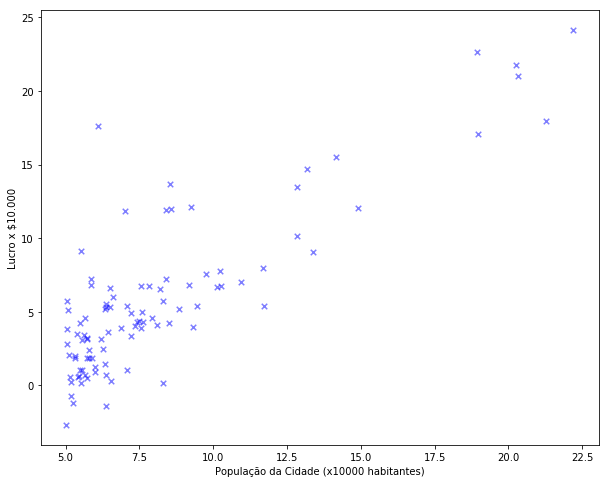

In [3]:
#gerando o gráfico de dispersão
#para analise preliminar dos dados
plt.figure(figsize=(10,8))
plt.ylabel("Lucro x $10.000")
plt.xlabel("População da Cidade (x10000 habitantes)")
plt.scatter(x, y, s=30, alpha=0.5, marker='x', color='b')
#exibe o gráfico
plt.show()

## 1.2 Gradiente Descendente

Função de custo a ser utilizada para encontrar o gradiente. E função de erro quadratico

In [4]:
def computarCusto(th0, th1, x, y):
    m = len(y)
    return 1.0 / m * sum([(th0 + th1 * x[i] - y[i]) for i in range(m)])

Implementação do gradiente descendente para descobrir qual função hipotese minimiza o erro para os dados.
Esta função utiliza a função de custo para calcular o gradiente.

In [5]:
def gradiente_descendente(x, y, alpha = 0.01, convergencia = 0.01, max_iteracoes = 1000):
    convergiu = False
    iteracoes = 0

    m = x.shape[0]

    #calculando os thetas iniciais
    th0 = 0
    th1 = 0

    #calculando o erro total, J(theta)
    J = sum([(th0 + th1 * x[i] - y[i]) ** 2 for i in range(m)])

    while not convergiu:
        #atualizando o numero de iteraçoes
        iteracoes += 1
        
        # para cada exemplo de treinamento, computar o gradiente (d/d_theta_j(theta)
        grad0 =  computarCusto(th0, th1, x, y)
        grad1 = 1.0 / m * sum([(th0 + th1 * x[i] - y[i]) * x[i] for i in range(m)])

        # atualizando os thteas temporarios theta_temp
        temp0 = th0 - alpha * grad0
        temp1 = th1 - alpha * grad1

        #atualizando os thetas
        th0 = temp0
        th1 = temp1

        # erro medio quadratico
        erro = sum([(th0 + th1 * x[i] - y[i]) ** 2 for i in range(m)])

        #verificando o criterio de convergencia
        if abs(J - erro) <= convergencia:
            print('Convergiu após', iteracoes, 'iterações !!!')
            convergiu = True

        #atualizando o erro (J)
        J = erro

        #segundo criterio de parada, maximo de iterações atingidas
        if iteracoes == max_iteracoes:
            print("Maximo de iteracoes atingidas", max_iteracoes)
            convergiu = True

    print("theta0", th0, "theta1", th1)
    
    def fn_hipotese(x1):
        return  th0 + th1 * x1
    
    return fn_hipotese

In [6]:
#executando o algoritmos de regressão linear
fn_hipotese = gradiente_descendente(x, y, max_iteracoes = 10000)

Convergiu após 1279 iterações !!!
theta0 [-3.50021861] theta1 [ 1.15329512]


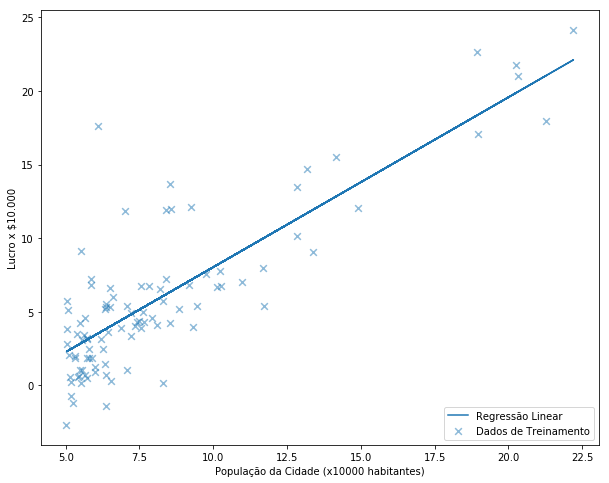

In [7]:
#criando o gráfico
plt.figure(figsize=(10,8))
plt.ylabel("Lucro x $10.000")
plt.xlabel("População da Cidade (x10000 habitantes)")

#Geração a dispersão dos dados
plt.scatter(x, y, s=45, alpha=0.5, marker='x', label='Dados de Treinamento')
#tracando a linha de regressão linear sobre o gráfico
plt.plot(x, fn_hipotese(x), '-', label='Regressão Linear')


#adicionando legenda ao gráfico
lgnd = plt.legend(loc="lower right", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._legmarker.set_markersize(6)

#exibindo o grafico
plt.show()

In [8]:
#Usando o modelo Gerado para predizer o lucro em regiões com 35000 habitentes (3.5 x 10000)
#Para isso iremos aplicar a formulo yˆ= a + bx, onde x é a quantidade de habitantes
print("Lucro presumido para 35000 habitantes", fn_hipotese(3.5))

Lucro presumido para 35000 habitantes [ 0.53631432]


In [9]:
#Usando o modelo Gerado para predizer o lucro em regiões com 70000 habitentes (7.0 x 10000)
#Para isso iremos aplicar a formulo yˆ= a + bx, onde x é a quantidade de habitantes
print("Lucro presumido para 70000 habitantes", fn_hipotese(7))

Lucro presumido para 70000 habitantes [ 4.57284726]


In [10]:
#variacao 
delta = 0.01

#Criando distribuições normais para os theta0 e theta1
theta0 = np.arange(-10.0, 10.0, delta)
theta1 = np.arange(-1.0, 4.0, delta)
